## Student Performance Indicator


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [5]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
%matplotlib inline
import pickle

#### Import the CSV Data as Pandas DataFrame

In [6]:
df = pd.read_csv('data/stud.csv')

#### Show Top 5 Records

In [7]:
df.head()

,cust_id,income,debt_with_other_lenders,credit_score,has_previous_defaults_other_lenders,num_remittances_prev_12_mth,remittance_amt_prev_12_mth,main_remittance_corridor,opened_campaign_1,opened_campaign_2,opened_campaign_3,opened_campaign_4,tenure_years,churned
0,1,63863.135880,87983.134390,20.0,0,22,23377.338230,AE_IN,0,0,0,0,2.065258,0
1,2,51537.479640,63655.109150,17.0,0,20,8353.525522,AE_PK,0,0,0,0,2.761676,0
2,3,3298.248451,4776.336091,2.0,0,26,1213.782465,AE_PK,0,0,0,0,0.297064,1
3,4,14402.605700,13925.390670,5.0,0,18,6202.880445,AE_IN,0,0,0,0,2.623058,0
4,5,8635.683507,10143.513660,3.0,0,21,6175.393029,AE_PK,0,0,0,0,0.160443,0


#### Shape of the dataset

In [8]:
df.shape

(7432, 14)

### 2.2 Dataset information

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [9]:
df.isna().sum()

cust_id                                  0
income                                 233
debt_with_other_lenders                295
credit_score                           295
has_previous_defaults_other_lenders      0
num_remittances_prev_12_mth              0
remittance_amt_prev_12_mth               0
main_remittance_corridor                 0
opened_campaign_1                        0
opened_campaign_2                        0
opened_campaign_3                        0
opened_campaign_4                        0
tenure_years                             0
churned                                  0
dtype: int64

In [10]:
df1 = df.dropna()
df.head()

,cust_id,income,debt_with_other_lenders,credit_score,has_previous_defaults_other_lenders,num_remittances_prev_12_mth,remittance_amt_prev_12_mth,main_remittance_corridor,opened_campaign_1,opened_campaign_2,opened_campaign_3,opened_campaign_4,tenure_years,churned
0,1,63863.135880,87983.134390,20.0,0,22,23377.338230,AE_IN,0,0,0,0,2.065258,0
1,2,51537.479640,63655.109150,17.0,0,20,8353.525522,AE_PK,0,0,0,0,2.761676,0
2,3,3298.248451,4776.336091,2.0,0,26,1213.782465,AE_PK,0,0,0,0,0.297064,1
3,4,14402.605700,13925.390670,5.0,0,18,6202.880445,AE_IN,0,0,0,0,2.623058,0
4,5,8635.683507,10143.513660,3.0,0,21,6175.393029,AE_PK,0,0,0,0,0.160443,0


In [11]:
df1.shape

(6638, 14)

### 3.2 Check Duplicates

In [12]:
df1.duplicated().sum()

0

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [13]:
# Check Null and Dtypes
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6638 entries, 0 to 7431
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   cust_id                              6638 non-null   int64  
 1   income                               6638 non-null   float64
 2   debt_with_other_lenders              6638 non-null   float64
 3   credit_score                         6638 non-null   float64
 4   has_previous_defaults_other_lenders  6638 non-null   int64  
 5   num_remittances_prev_12_mth          6638 non-null   int64  
 6   remittance_amt_prev_12_mth           6638 non-null   float64
 7   main_remittance_corridor             6638 non-null   object 
 8   opened_campaign_1                    6638 non-null   int64  
 9   opened_campaign_2                    6638 non-null   int64  
 10  opened_campaign_3                    6638 non-null   int64  
 11  opened_campaign_4                  

### 3.4 Checking the number of unique values of each column

In [14]:
df1.nunique()

cust_id                                6638
income                                 6638
debt_with_other_lenders                6638
credit_score                             20
has_previous_defaults_other_lenders       2
num_remittances_prev_12_mth              85
remittance_amt_prev_12_mth             6638
main_remittance_corridor                  3
opened_campaign_1                         2
opened_campaign_2                         2
opened_campaign_3                         2
opened_campaign_4                         2
tenure_years                           6638
churned                                   2
dtype: int64

In [15]:
def print_unique_col_values(df1):
       for column in df:
            print(f'{column}: {df[column].unique()}') 
print_unique_col_values(df1)

cust_id: [   1    2    3 ... 7430 7431 7432]
income: [63863.13588  51537.47964   3298.248451 ... 46424.99755  28140.26622
 14095.82627 ]
debt_with_other_lenders: [87983.13439  63655.10915   4776.336091 ... 24527.67428  58965.30648
 13166.6542  ]
credit_score: [20. 17.  2.  5.  3.  7.  1.  8.  9.  4.  6. 12. 19. nan 11. 13. 14. 16.
 10. 15. 18.]
has_previous_defaults_other_lenders: [0 1]
num_remittances_prev_12_mth: [ 22  20  26  18  21  13  24  25  31  23  28  27  30  29 316  14  16  12
  34   8  19  33 324  17  32  35 327  15 347 339  11 314 328 329  38 323
   9  36 330 349  37  40 336 341 332 319 344 348 345 325 311 303 309  10
 342 338 335 321 337 300 313 340 302 308 322 304 333 334 317 343 306 320
 346 310 307 301 312 318 305 350  39 315 326 331   7]
remittance_amt_prev_12_mth: [23377.33823   8353.525522  1213.782465 ... 22261.95628   6162.548544
  4289.214953]
main_remittance_corridor: ['AE_IN' 'AE_PK' 'AE_PH']
opened_campaign_1: [0 1]
opened_campaign_2: [0 1]
opened_campaign_3: [

##### One of our feature/colums apears to be a categorical data, lets treat that

##### Performing One hot encoding for categorical column (main_remittance_corridor)

In [16]:
# df2 = pd.get_dummies(data=df1, columns=['main_remittance_corridor'])
# df2.head()


In [17]:
# columns_to_replace = ['main_remittance_corridor_AE_IN', 'main_remittance_corridor_AE_PH', 'main_remittance_corridor_AE_PK']

# for column in columns_to_replace:
#     df2[column] = df2[column].astype(int)

# df2.head()

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6638 entries, 0 to 7431
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   cust_id                              6638 non-null   int64  
 1   income                               6638 non-null   float64
 2   debt_with_other_lenders              6638 non-null   float64
 3   credit_score                         6638 non-null   float64
 4   has_previous_defaults_other_lenders  6638 non-null   int64  
 5   num_remittances_prev_12_mth          6638 non-null   int64  
 6   remittance_amt_prev_12_mth           6638 non-null   float64
 7   main_remittance_corridor             6638 non-null   object 
 8   opened_campaign_1                    6638 non-null   int64  
 9   opened_campaign_2                    6638 non-null   int64  
 10  opened_campaign_3                    6638 non-null   int64  
 11  opened_campaign_4                  

### 3.5 Check statistics of data set

In [19]:
df1.describe()

,cust_id,income,debt_with_other_lenders,credit_score,has_previous_defaults_other_lenders,num_remittances_prev_12_mth,remittance_amt_prev_12_mth,opened_campaign_1,opened_campaign_2,opened_campaign_3,opened_campaign_4,tenure_years,churned
count,6638.000000,6638.000000,6638.000000,6638.000000,6638.000000,6638.000000,6638.000000,6638.000000,6638.000000,6638.000000,6638.000000,6638.000000,6638.000000
mean,3717.925279,24077.287863,31987.129237,8.015065,0.201115,34.302049,10769.823404,0.041277,0.021995,0.013106,0.111178,1.496376,0.072462
std,2144.916168,18905.538858,36988.660096,5.020562,0.400864,57.685320,9850.897280,0.198946,0.146677,0.113739,0.314376,0.871284,0.259270
min,1.000000,1434.354208,653.062575,1.000000,0.000000,7.000000,455.821035,0.000000,0.000000,0.000000,0.000000,0.000322,0.000000
25%,1865.250000,11657.025275,11083.185205,4.000000,0.000000,20.000000,4580.143122,0.000000,0.000000,0.000000,0.000000,0.738610,0.000000
50%,3710.500000,19010.887035,20660.959015,7.000000,0.000000,23.000000,8068.427593,0.000000,0.000000,0.000000,0.000000,1.495018,0.000000
75%,5575.750000,30246.748850,39374.946608,10.000000,0.000000,27.000000,13718.816140,0.000000,0.000000,0.000000,0.000000,2.252410,0.000000
max,7432.000000,244970.926100,715752.663000,20.000000,1.000000,350.000000,137563.019000,1.000000,1.000000,1.000000,1.000000,2.999704,1.000000


### 3.7 Exploring Data

In [20]:
df1.head()

,cust_id,income,debt_with_other_lenders,credit_score,has_previous_defaults_other_lenders,num_remittances_prev_12_mth,remittance_amt_prev_12_mth,main_remittance_corridor,opened_campaign_1,opened_campaign_2,opened_campaign_3,opened_campaign_4,tenure_years,churned
0,1,63863.135880,87983.134390,20.0,0,22,23377.338230,AE_IN,0,0,0,0,2.065258,0
1,2,51537.479640,63655.109150,17.0,0,20,8353.525522,AE_PK,0,0,0,0,2.761676,0
2,3,3298.248451,4776.336091,2.0,0,26,1213.782465,AE_PK,0,0,0,0,0.297064,1
3,4,14402.605700,13925.390670,5.0,0,18,6202.880445,AE_IN,0,0,0,0,2.623058,0
4,5,8635.683507,10143.513660,3.0,0,21,6175.393029,AE_PK,0,0,0,0,0.160443,0


### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

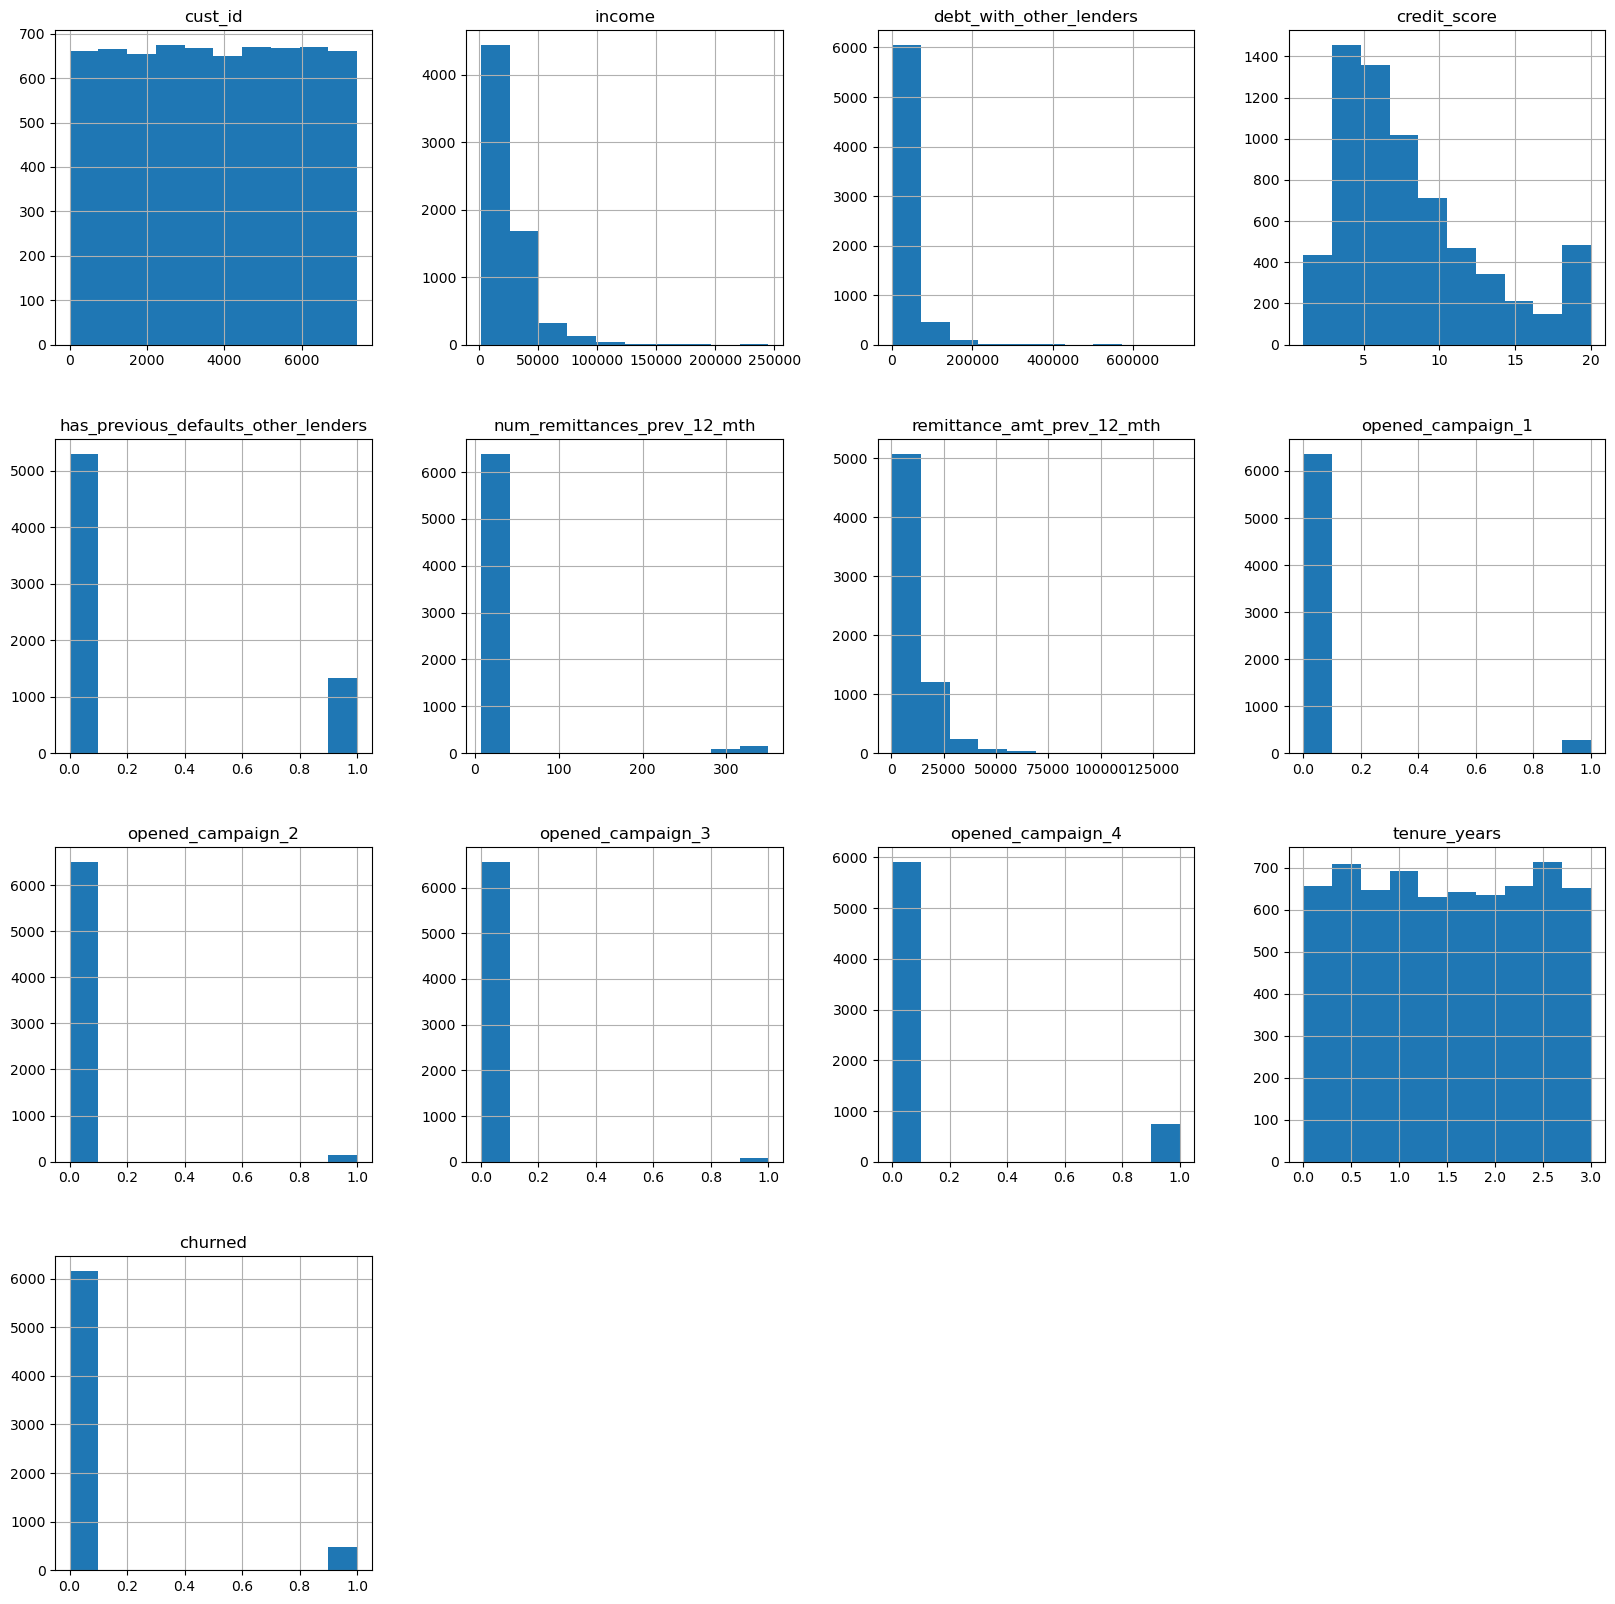

In [21]:
df1.hist(figsize=(20,20))
plt.show()

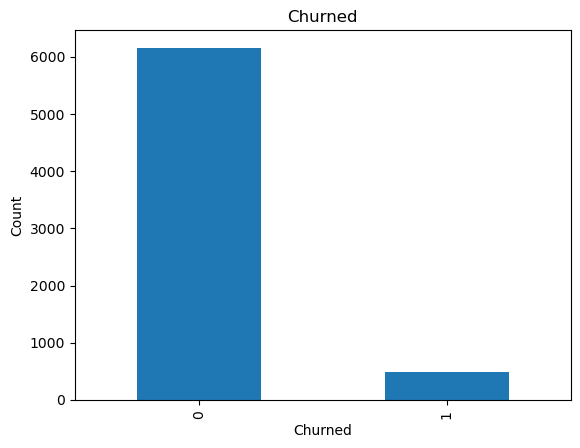

In [22]:
# plot bar chat for colum churned, show count of each category and show labels

df1['churned'].value_counts().plot(kind='bar')
plt.title('Churned')
plt.xlabel('Churned')
plt.ylabel('Count')
plt.show()


In [23]:
print("Percentage of Customer Churned is {:.1f}% and non-promoted employees is: {:.1f}%".format(
    df1[df1['churned'] == 1].shape[0] / df1.shape[0]*100,
    df1[df1['churned'] == 0].shape[0] / df1.shape[0]*100))

Percentage of Customer Churned is 7.2% and non-promoted employees is: 92.8%


In [24]:
#return numeric column as df
df2 = df1.select_dtypes(include=['int64', 'float64']).head()
# Calculate correlations
corr = df2.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

<Axes: >

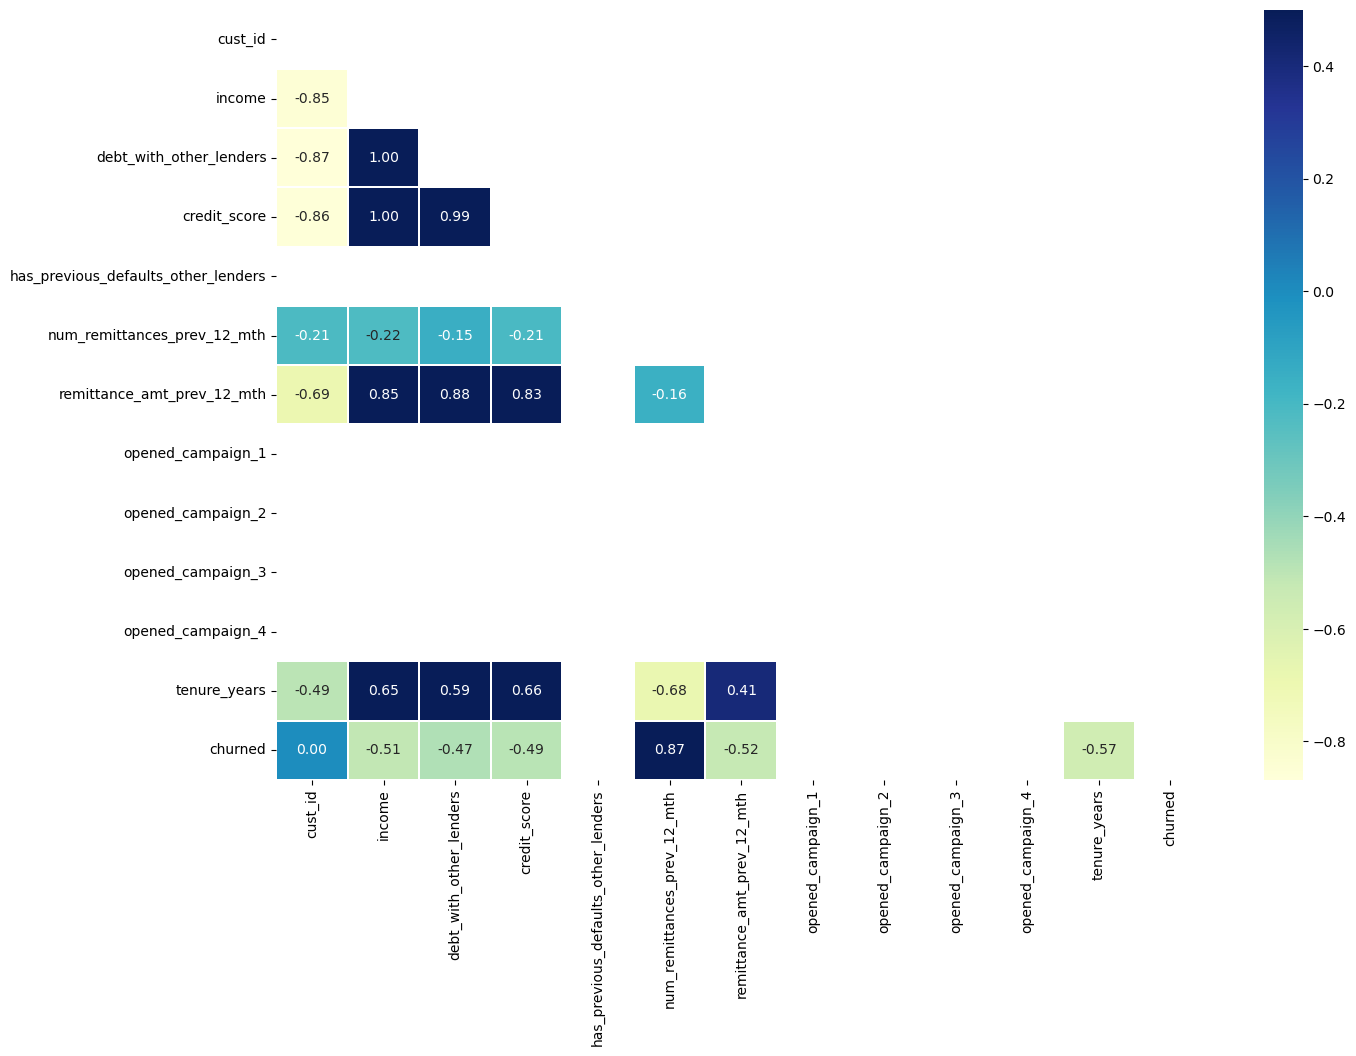

In [25]:
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
             annot=True, fmt='.2f',
            linewidths=.2, cmap="YlGnBu")

In [26]:
correlations = df2.corr()['churned'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(5))
print('\nMost Negative Correlations: \n', correlations.head(5))

Most Positive Correlations: 
 has_previous_defaults_other_lenders   NaN
opened_campaign_1                     NaN
opened_campaign_2                     NaN
opened_campaign_3                     NaN
opened_campaign_4                     NaN
Name: churned, dtype: float64

Most Negative Correlations: 
 tenure_years                 -0.568497
remittance_amt_prev_12_mth   -0.521276
income                       -0.510497
credit_score                 -0.489905
debt_with_other_lenders      -0.468031
Name: churned, dtype: float64


In [27]:
# save data set to src/data as csv file

df1.to_csv('data/data.csv', index=False)

In [28]:
# print all column in df1

df1.columns

Index(['cust_id', 'income', 'debt_with_other_lenders', 'credit_score',
       'has_previous_defaults_other_lenders', 'num_remittances_prev_12_mth',
       'remittance_amt_prev_12_mth', 'main_remittance_corridor',
       'opened_campaign_1', 'opened_campaign_2', 'opened_campaign_3',
       'opened_campaign_4', 'tenure_years', 'churned'],
      dtype='object')